In [1]:
#Importing Pandas
import pandas as pd

In [2]:
#Importing the DataSet to a DataFrame
df = pd.read_json('loan_data.json')

In [3]:
#Displaying the DataFrame
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [4]:
df.head() # shows the first 5 rows

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [5]:
df.tail() #shows the last 5 rows

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y
510,LP002990,Female,No,0,Graduate,Yes,0,Semiurban,medium,N


In [6]:
df.describe() 
#Since this DataFrame has both Numerical as well as Categorical data. Therefore, it is not able to describe properly.

,Credit_History
count,511.000000
mean,0.843444
std,0.363738
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


Here, only Credit_History is fully Numerical thus, describe() only works here for it.

In [7]:
df.info() #so no null values are found!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


# Q1. Find % of total applicants for each unique value of dependents

In [8]:
dep = df.groupby(df.Dependents)
dep.count()

,Application_ID,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Dependents,,,,,,,,,
0,294,294,294,294,294,294,294,294,294
1,85,85,85,85,85,85,85,85,85
2,88,88,88,88,88,88,88,88,88
3+,44,44,44,44,44,44,44,44,44


In [9]:
#So % of total applicants with 0 - Dependents are : 
print(round(294/511*100), "% of total applicants are with '0 - Dependents'")

58 % of total applicants are with '0 - Dependents'


In [10]:
#So % of total applicants with 1 - Dependents are : 
print(round(85/511*100), "% of total applicants are with '1 - Dependents'")

17 % of total applicants are with '1 - Dependents'


In [11]:
#So % of total applicants with 2 - Dependents are : 
print(round(88/511*100), "% of total applicants are with '2 - Dependents'")

17 % of total applicants are with '2 - Dependents'


In [12]:
#So % of total applicants with 3+ - Dependents are : 
print(round(44/511*100), "% of total applicants are with '3+ - Dependents'")

9 % of total applicants are with '3+ - Dependents'


# Q2. Find the average number of dependents per applicant

In [13]:
df.groupby(['Dependents']).mean()

,Credit_History
Dependents,
0,0.850340
1,0.835294
2,0.875000
3+,0.750000


Hence, above are the required average of each dependents.

# Q3. Find the % of applications approved for self-employed applicants

In [14]:
df.groupby(['Self_Employed','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Self_Employed Application_Status                                                
No            N                              140     140      140         140   
              Y                              301     301      301         301   
Yes           N                               24      24       24          24   
              Y                               46      46       46          46   

                                  Education  Credit_History  Property_Area  \
Self_Employed Application_Status                                             
No            N                         140             140            140   
              Y                         301             301            301   
Yes           N                          24              24             24   
              Y                          46              46             46   

                                  Income  
Self_Employed Application_Status          
No            N                      140  
              Y                      301  
Yes           N                       24  
              Y                       46

In [15]:
# Therefore, as we can see 46 is the count of applications Self Employed with Application Status of Yes. Thus,
print(round(46/511*100),"% of applications are approved for Self_Employed applicants!")

9 % of applications are approved for Self_Employed applicants!


# Q4. What is the % of rejections for married male applicants

In [16]:
df.groupby(['Married','Gender','Application_Status']).count()

Application_ID  Dependents  Education  \
Married Gender Application_Status                                          
No      Female N                               26          26         26   
               Y                               40          40         40   
        Male   N                               43          43         43   
               Y                               71          71         71   
Yes     Female N                                8           8          8   
               Y                               17          17         17   
        Male   N                               87          87         87   
               Y                              219         219        219   

                                   Self_Employed  Credit_History  \
Married Gender Application_Status                                  
No      Female N                              26              26   
               Y                              40              40   
        Male   N                              43              43   
               Y                              71              71   
Yes     Female N                               8               8   
               Y                              17              17   
        Male   N                              87              87   
               Y                             219             219   

                                   Property_Area  Income  
Married Gender Application_Status                         
No      Female N                              26      26  
               Y                              40      40  
        Male   N                              43      43  
               Y                              71      71  
Yes     Female N                               8       8  
               Y                              17      17  
        Male   N                              87      87  
               Y                             219     219

Hence, we can clearly see that 87 applications or married males are rejected in total out of 511

In [17]:
print("Therefore,",round(87/511*100),"% of Married Males are Rejected!")

Therefore, 17 % of Married Males are Rejected!


# Q5. Which property area has the maximum approval ratio

In [18]:
df.groupby(['Property_Area','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Property_Area Application_Status                                                
Rural         N                               59      59       59          59   
              Y                               90      90       90          90   
Semiurban     N                               44      44       44          44   
              Y                              153     153      153         153   
Urban         N                               61      61       61          61   
              Y                              104     104      104         104   

                                  Education  Self_Employed  Credit_History  \
Property_Area Application_Status                                             
Rural         N                          59             59              59   
              Y                          90             90              90   
Semiurban     N                          44             44              44   
              Y                         153            153             153   
Urban         N                          61             61              61   
              Y                         104            104             104   

                                  Income  
Property_Area Application_Status          
Rural         N                       59  
              Y                       90  
Semiurban     N                       44  
              Y                      153  
Urban         N                       61  
              Y                      104

In [19]:
print("Approval ratio of Rural is : ",90/59)
print("Approval ratio of Semiurban is : ",153/44)
print("Approval ratio of Urban is : ",104/61)

Approval ratio of Rural is :  1.5254237288135593
Approval ratio of Semiurban is :  3.477272727272727
Approval ratio of Urban is :  1.7049180327868851


Clearly, Semiurban has the maximum approval ratio followed by Urban and Rural.

# Q6. Find average dependents per income group

In [20]:
import seaborn as sns #for visualising the graphs

<AxesSubplot:xlabel='Income', ylabel='count'>

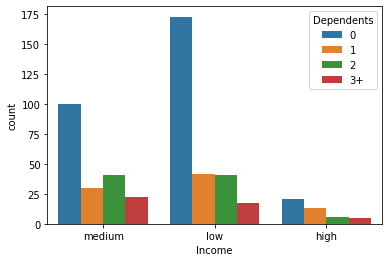

In [21]:
sns.countplot(hue=df.Dependents,x=df.Income) #Visualising the Income Groups with the Dependents

In [22]:
# Average no. of dependents per Income group i.e high, low and medium is :
df.groupby(['Income','Dependents']).count()

Application_ID  Gender  Married  Education  Self_Employed  \
Income Dependents                                                              
high   0                       21      21       21         21             21   
       1                       13      13       13         13             13   
       2                        6       6        6          6              6   
       3+                       5       5        5          5              5   
low    0                      173     173      173        173            173   
       1                       42      42       42         42             42   
       2                       41      41       41         41             41   
       3+                      17      17       17         17             17   
medium 0                      100     100      100        100            100   
       1                       30      30       30         30             30   
       2                       41      41       41         41             41   
       3+                      22      22       22         22             22   

                   Credit_History  Property_Area  Application_Status  
Income Dependents                                                     
high   0                       21             21                  21  
       1                       13             13                  13  
       2                        6              6                   6  
       3+                       5              5                   5  
low    0                      173            173                 173  
       1                       42             42                  42  
       2                       41             41                  41  
       3+                      17             17                  17  
medium 0                      100            100                 100  
       1                       30             30                  30  
       2                       41             41                  41  
       3+                      22             22                  22

Also, we can cleary see that : 

In [23]:
df.groupby(['Income']).count() 

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Application_Status
Income,,,,,,,,,
high,45,45,45,45,45,45,45,45,45
low,273,273,273,273,273,273,273,273,273
medium,193,193,193,193,193,193,193,193,193


Out of all the Income groups, Applicants belonging to low income group has the highest no. of loan application.

# Q7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score

In [24]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [25]:
#Dropping unnecessary columns from the dataframe
df.drop(['Application_ID'],axis=1,inplace=True)

In [26]:
#Converting the data to 0's and 1's for fitting our model
from sklearn.preprocessing import LabelEncoder #LaberEncoder because converting of the data into machine form

column = ['Gender','Married','Dependents','Education','Self_Employed',
        'Credit_History','Property_Area','Income','Application_Status']

all = LabelEncoder()

for i in column :
    df[i] = all.fit_transform(df[i])

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


In [28]:
df.describe() #now able to describe well because all the columns are numerical now and not categorical.

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
count,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.821918,0.64775,0.769080,0.215264,0.136986,0.843444,1.031311,1.289628,0.679061
std,0.382957,0.47814,1.020142,0.411408,0.344170,0.363738,0.784031,0.618561,0.467295
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.00000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000
max,1.000000,1.00000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000


In [29]:
#Describing all the columns 
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Income', 'Application_Status'],
      dtype='object')

In [30]:
#Separating x and y into training and testing datasets
x = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y = df.Application_Status

In [31]:
#Importing required libraries 
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
#Splitting into training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=7)

In [33]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)*100)

88.3495145631068


In [34]:
print('Hence Accuracy is :',round(88.3495145631068),'%')

Hence Accuracy is : 88 %


### Now, Checking if a Loan Application will be Accepted or Rejected -

<AxesSubplot:>

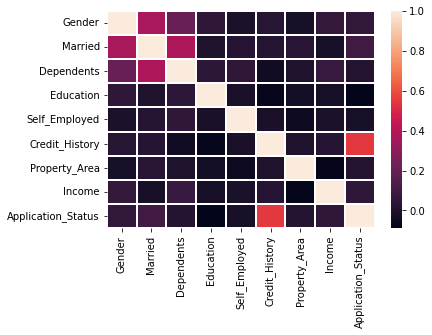

In [35]:
#finding correlation between the variables
sns.heatmap(df.corr(), linewidths=0.1)

In [36]:
#corr matrix
df.corr().round(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Gender,1.00,0.36,0.20,0.04,-0.01,0.02,-0.02,0.06,0.05
Married,0.36,1.00,0.38,-0.00,0.02,0.02,0.03,-0.02,0.10
Dependents,0.20,0.38,1.00,0.04,0.05,-0.04,-0.00,0.08,0.02
Education,0.04,-0.00,0.04,1.00,-0.01,-0.08,-0.03,-0.02,-0.09
Self_Employed,-0.01,0.02,0.05,-0.01,1.00,-0.02,-0.05,-0.01,-0.02
Credit_History,0.02,0.02,-0.04,-0.08,-0.02,1.00,-0.00,0.02,0.55
Property_Area,-0.02,0.03,-0.00,-0.03,-0.05,-0.00,1.00,-0.08,0.02
Income,0.06,-0.02,0.08,-0.02,-0.01,0.02,-0.08,1.00,0.04
Application_Status,0.05,0.10,0.02,-0.09,-0.02,0.55,0.02,0.04,1.00


#### Clearly, Credit_History is correlated with Application_Status

### Now, Checking the Approval on the basis of Credit_History -

In [37]:
df.groupby(['Application_Status','Credit_History']).count() 

Gender  Married  Dependents  Education  \
Application_Status Credit_History                                           
0                  0                   73       73          73         73   
                   1                   91       91          91         91   
1                  0                    7        7           7          7   
                   1                  340      340         340        340   

                                   Self_Employed  Property_Area  Income  
Application_Status Credit_History                                        
0                  0                          73             73      73  
                   1                          91             91      91  
1                  0                           7              7       7  
                   1                         340            340     340

Here, 0 - No and 1 - yes 

#### Hence, Applicants having a Credit History are more likely to get Loan Approval i.e. Applicants with Credit_History have higher chance of Loan Approval.